In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
img1 = plt.imread('IMG1.png')
img2 = plt.imread('IMG2.png')

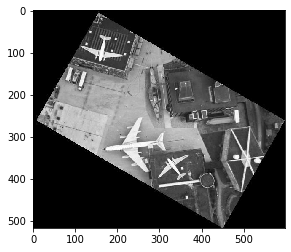

In [6]:
plt.imshow(img2,cmap='gray')

In [7]:
img2.shape

(517, 598)

In [8]:
#point correspondence is given, Need to find homography matrix
x1 = 29
x2 = 93
y1 = 124
y2 = 248
x3 = 157
x4 = 328
y3 = 372
y4 = 399

In [9]:
A = np.zeros((4,4))

In [10]:
A[0,0] = -x1
A[0,1] = -y1
A[0,2] = -1
A[1,0] = -y1
A[1,1] = x1
A[1,3] = -1
A[2,0] = -x3
A[2,1] = -y3
A[2,2] = -1
A[3,0] = -y3
A[3,1] = x3
A[3,3] = -1

In [11]:
A

array([[ -29., -124.,   -1.,    0.],
       [-124.,   29.,    0.,   -1.],
       [-157., -372.,   -1.,    0.],
       [-372.,  157.,    0.,   -1.]])

In [12]:
b = np.zeros((4,1))

In [13]:
b[0,0] = x2
b[1,0] = y2
b[2,0] = x4
b[3,0] = y4

In [14]:
val = np.linalg.solve(A,b) #homography matrix values values

In [16]:
val

array([[  -0.8669885 ],
       [  -0.50010271],
       [  -5.84459737],
       [-154.99640509]])

In [18]:
#Source image is 296 by 512 Need to change the shape to 517 by 598
h1,w1 = img1.shape
h2,w2 = img2.shape
t = np.zeros((h2,w2)) 
for i in range(h1):
    for j in range(w1):
        t[i,j] = img1[i,j]

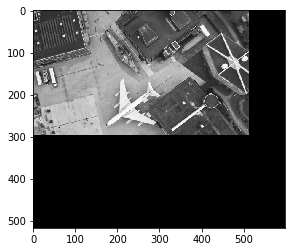

In [19]:
plt.imshow(t,cmap='gray')

In [20]:
#Homography matrix
H = np.zeros((3,3))
H[0,0] = val[0,0]
H[0,1] = val[1,0]
H[0,2] = val[2,0]
H[1,0] = -val[1,0]
H[1,1] = val[0,0]
H[1,2] = val[3,0]
H[2,2] = -1

In [21]:
H = -H
H_inv = np.linalg.inv(H) 

In [22]:
H

array([[  0.8669885 ,   0.50010271,   5.84459737],
       [ -0.50010271,   0.8669885 , 154.99640509],
       [ -0.        ,  -0.        ,   1.        ]])

In [23]:
#From IMage1 finding the target image after applying homography
target = np.zeros((h2,w2)) 
for i in range(h2):
    for j in range(w2):
        x_s,y_s,z = np.dot(H_inv,[i,j,1])
        x_s = x_s/z #Getting the cartesian coordinate from homogeneous coordinate
        y_s = y_s/z
        x_s_new = math.floor(x_s)
        y_s_new = math.floor(y_s)
        b = y_s - y_s_new
        a = x_s - x_s_new
        #assigining target pixel intensity using bilinear interpolation
        if x_s_new>=0 and x_s_new<(h2-1) and y_s_new>=0 and y_s_new<(w2-1):
            target[i,j] = (1-a)*(1-b)*t[x_s_new,y_s_new] + (1-a)*(b)*t[x_s_new,y_s_new + 1] + (a)*(1-b)*t[x_s_new+1,y_s_new]+(a)*(b)*t[x_s_new + 1 , y_s_new + 1]


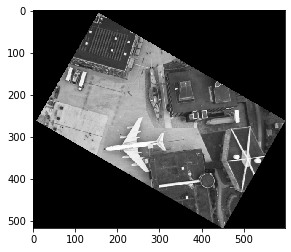

In [24]:
plt.imshow(target,cmap = 'gray')

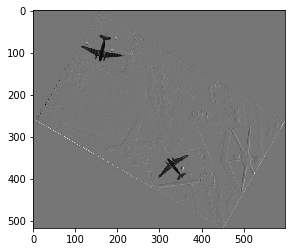

In [25]:
plt.imshow(target-img2,cmap = 'gray')